# Has the network latency gone up since we switched internet service providers?

$H_0$: The network latency hasn't gone up since we switched internet service providers 

$H_a$: The network latency has gone up since we switched internet service providers

True Negative : Failed to reject $H_0$, 

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers:  50ms

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- The internet speed actually not inproved, but due to lower usage, the test result looks it has improved
True Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers: 61ms

False Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg survey score after plants: 61ms
- The internet speed indeed inproved, but due to high usage, it didn't show up on the result

# Is the website redesign any good?
$H_0$: The website redesign is same as before.

$H_a$: The website redesign is better than before.

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%
- Maybe beacuse a special event happened increased the click rate

True Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 30%

False Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 31%
- The test results has no significant difference, but the reality is there is a significant difference 

# Is our television ad driving more sales?
$H_0$:  Our sales is same as before since the start of our television ad.

$H_a$:  Our sales is actually increased since the start of our television ad

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- taking into consideration, there's no other factors affect the results

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- Maybe a pandemic happens and our sales increased, no significant evidence to prove it's because of our television ad

True Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10500
- no significant evidence to show the sale is actually changed a lot

False Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10000
- The test results has no significant difference, but the reality is there is a significant difference of sales between before the tlevision ad and after the television ad

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
df = pd.read_csv('exam_scores.csv')
df.study_strategy.fillna('None', inplace=True)

 # exercise 1
 Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
 
 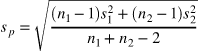

$H_0$: There is no difference in regard to the average time for selling homes for its two offices

$H_a$: There is a difference in regard to the average time for selling homes for its two offices

In [2]:
n1 = 40
s1 = 15
x̄1 = 90
n2 = 50
s2 = 20
x̄2 = 100
degf = (n1 + n2) - 2

In [3]:
Sp = sqrt(((n1-1)*s1**2 +(n2-1)*s2**2)/(n1+n2-2))
Sp

17.956702977389302

In [4]:
t = (x̄1 - x̄2) / (Sp * sqrt(1 / n1 + 1 / n2))
t

-2.6252287036468456

In [5]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

because p value is less than a value, reject the null hypothesis, which indicates that there is a statistically significant difference in regard to the average time for selling homes for its two offices

In [64]:
mpg = data('mpg')
mpg = mpg.rename(columns = {'class':'class_type'})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

# 1
$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

confidence level: 0.05

In [65]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

In [66]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value 0.97 is much higher than a value 0.05, failed reject the H0,
# which means there is no difference between them.

(-0.03286431672888292, 0.9738110448529322)

# 2

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: Compact cars are morefuel-efficient than the average car

confidence level: 0.05


In [69]:
x = mpg[mpg.class_type == 'compact'].hwy
mu = mpg.hwy.mean()
p = stats.ttest_1samp(x, mu)
p[1] < 0.05

# Since p value is less than a value, reject the null hypothesis, which means there is a statistically significant
# diffrence between compact cars and the average cars in regard to fuel-efficient

True

# 3

- $H_0$: Manual cars are same as automatic cars in regard to gas mileage 
- $H_a$: manual cars get better gas mileage than automatic cars
- confidence level: 0.05


In [10]:
auto = mpg.trans.str.contains('auto')
manual = mpg.trans.str.contains('manual')
x1 = mpg[auto].hwy
x2 = mpg[manual].hwy

In [11]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value is less than a value,  reject the null hypothesis that there
# is no  statistically significant difference between manual cars and automatic cars in regard to gas mileage

(-4.368349972819688, 1.888044765552951e-05)

# Correlation

> Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

- $H_0$: There is no linear relationship between tenure and monthly charges 
- $H_a$: There is linear relationship between tenure and monthly charges 



In [106]:
from env import get_db_url
query = """
    select * from customers
    join internet_service_types using(internet_service_type_id)
    """
url = get_db_url("telco_churn")
customers = pd.read_sql(query, url)
customers

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,1,0015-UOCOJ,Female,1,No,No,7,Yes,No,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,1,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3,9970-QBCDA,Female,0,No,No,6,Yes,No,No internet service,...,No internet service,No internet service,No internet service,1,No,4,19.70,129.55,No,None
7039,3,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,No internet service,...,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No,None
7040,3,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,No internet service,...,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No,None
7041,3,9975-SKRNR,Male,0,No,No,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No,None


In [107]:
x = customers.tenure
y = customers.monthly_charges

In [108]:
r, p = stats.pearsonr(x, y)
print('r=', r)
print('p=', p)

r= 0.24789985628615002
p= 4.0940449915016345e-99


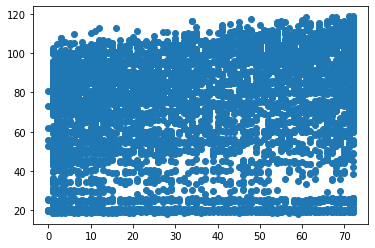

In [109]:
plt.scatter(x, y)

In [110]:
customers.total_charges = customers.total_charges.replace(' ', np.nan).astype(float)
customers = customers.dropna()
customers.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.60,593.30,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.90,542.40,No,DSL
2,1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,1,0015-UOCOJ,Female,1,No,No,7,Yes,No,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,1,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.90,No,DSL


In [111]:
x = customers.tenure
y = customers.total_charges

In [112]:
r, p = stats.pearsonr(x, y)
print('r=', r)
print('p=', p)

r= 0.825880460933202
p= 0.0


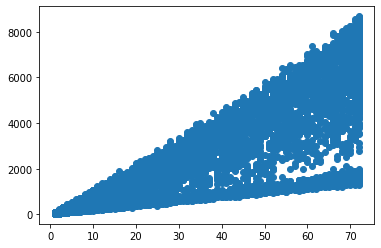

In [113]:
plt.scatter(x, y)

In [116]:
# phone customers with no internet service
phone_no_internet = customers[(customers.phone_service == "Yes") & (customers.internet_service_type == "None")]
phone_no_internet = phone_no_internet[["tenure", "monthly_charges", "total_charges"]]


In [118]:
stats.pearsonr(phone_no_internet.tenure, phone_no_internet.monthly_charges)

(0.34618773548574655, 4.896604599951957e-44)

In [119]:
stats.pearsonr(phone_no_internet.tenure, phone_no_internet.total_charges)

(0.9814648859044287, 0.0)

In [120]:
stats.pearsonr(phone_no_internet.monthly_charges, phone_no_internet.total_charges)

(0.48448535834260964, 2.767387829742139e-90)

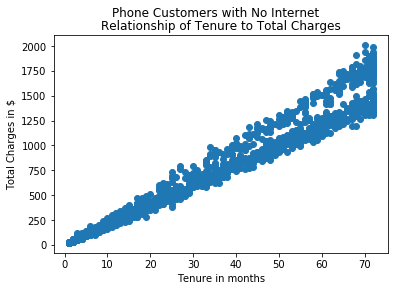

In [121]:
plt.suptitle("Phone Customers with No Internet")
plt.title("Relationship of Tenure to Total Charges")
plt.xlabel("Tenure in months")
plt.ylabel("Total Charges in $")
plt.scatter(phone_no_internet.tenure, phone_no_internet.total_charges)
plt.show()

In [122]:
# Customers with Phone and Fiber Internet
phone_fiber = customers[(customers.phone_service == "Yes") & (customers.internet_service_type == "Fiber optic")]
phone_fiber = phone_fiber[["tenure", "monthly_charges", "total_charges"]]

In [123]:
stats.pearsonr(phone_fiber.tenure, phone_fiber.total_charges)

(0.9853093528070602, 0.0)

In [124]:
stats.pearsonr(phone_fiber.tenure, phone_fiber.monthly_charges)

(0.6246206176175583, 0.0)

In [125]:
stats.pearsonr(phone_fiber.monthly_charges, phone_fiber.total_charges)

(0.7135248828873246, 0.0)

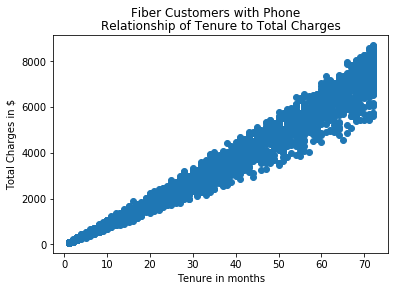

In [126]:
plt.suptitle("Fiber Customers with Phone")
plt.title("Relationship of Tenure to Total Charges")
plt.xlabel("Tenure in months")
plt.ylabel("Total Charges in $")
plt.scatter(phone_fiber.tenure, phone_fiber.total_charges)
plt.show()

In [127]:
phone_dsl = customers[(customers.phone_service == "Yes") & (customers.internet_service_type == "DSL")]
phone_dsl = phone_fiber[["tenure", "monthly_charges", "total_charges"]]

In [128]:
stats.pearsonr(phone_dsl.tenure, phone_dsl.monthly_charges)

(0.6246206176175583, 0.0)

In [129]:
stats.pearsonr(phone_dsl.monthly_charges, phone_dsl.total_charges)

(0.7135248828873246, 0.0)

In [130]:
stats.pearsonr(phone_dsl.tenure, phone_dsl.total_charges)

(0.9853093528070602, 0.0)

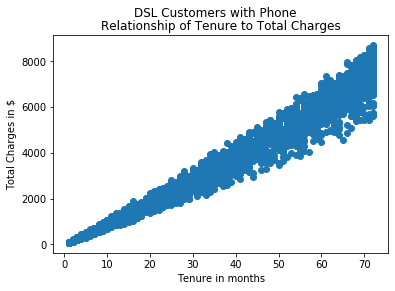

In [131]:
plt.suptitle("DSL Customers with Phone")
plt.title("Relationship of Tenure to Total Charges")

plt.xlabel("Tenure in months")
plt.ylabel("Total Charges in $")
plt.scatter(phone_dsl.tenure, phone_dsl.total_charges)
plt.show()

In [136]:
from env import get_db_url
query = """
select emp_no, salary, datediff(curdate(), hire_date) as "days"
from salaries
join employees using(emp_no)
where to_date > curdate()
"""
url = get_db_url("employees")
salaries = pd.read_sql(query, url)
salaries.head()

,emp_no,salary,days
0,10001,88958,12330
1,10002,72527,12547
2,10003,43311,12267
3,10004,74057,12172
4,10005,94692,11156


$H_0$: There is no linear relationship between salary and employee tenure

$H_a$: there is a linear relationship

In [135]:
alpha = .01 # is 1 - a 99% confidence level

In [139]:
r, p = stats.pearsonr(salaries.salary, salaries.days)
r, p

(0.30646256131860783, 0.0)

In [141]:
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis.


In [ ]:
query = '''
SELECT
    DATEDIFF(end_date, start_date) / 365.25 AS tenure,
    salary
FROM (
    SELECT
        e.emp_no,
        e.hire_date AS start_date,
        MAX(s.salary) AS salary,
        IF(
            de.to_date = '9999-01-01',
            (SELECT MAX(hire_date) FROM employees),
            de.to_date
        ) as end_date
    FROM employees e
    JOIN dept_emp de USING (emp_no)
    JOIN salaries s USING (emp_no)
    GROUP BY e.emp_no, start_date, end_date
) a
'''

employees = pd.read_sql(query, get_db_url('employees'))
employees

In [ ]:
stats.pearsonr(employees.tenure, employees.salary)

In [ ]:
plt.scatter(employees.tenure, employees.salary)

In [72]:
now = datetime.datetime.now()
now

NameError: name 'datetime' is not defined

# Exercise 1

$H_0$:  Using a macbook and being a codeup student are independent of each other.

$H_a$:  Using a macbook and being a codeup student are dependent of each other

In [26]:
index = ['Uses a Macbook', "Doesn't Use A Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


# Exercise 1

$H_0$:   Cylinder type and transmission type are independent of each other.

$H_a$:   Cylinder type and transmission type are dependent of each other.

In [30]:
mpg = data('mpg')
mpg.trans = mpg.trans.str[:-4]
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [35]:
pd.crosstab(mpg.cyl, mpg.trans, margins=True, normalize=True)

trans,auto,manual,All
cyl,,,
4,0.175214,0.170940,0.346154
5,0.008547,0.008547,0.017094
6,0.239316,0.098291,0.337607
8,0.247863,0.051282,0.299145
All,0.670940,0.329060,1.000000


In [38]:
observed = pd.crosstab(mpg.cyl, mpg.trans)
observed

trans,auto,manual
cyl,,
4,41,40
5,2,2
6,56,23
8,58,12


In [43]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[41 40]
 [ 2  2]
 [56 23]
 [58 12]]
---
Expected

[[54.34615385 26.65384615]
 [ 2.68376068  1.31623932]
 [53.0042735  25.9957265 ]
 [46.96581197 23.03418803]]
---

chi^2 = 18.8823
p     = 0.0003


Because p (0.0003) < alpha (.05), reject the null hypothesis, which indicates that Cylinder type and transmission type are dependent on each other

# Exercise 3
Use the data from the employees database to answer these questions:

$H_0$:   An employee's gender is independent on whether an employee works in sales or marketing. (only look at current employees)

$H_a$:   An employee's gender is dependent on whether an employee works in sales or marketing.


In [49]:
query = """
SELECT * FROM employees 
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE (dept_name = 'Marketing' OR dept_name = 'Sales') and dept_emp.to_date > now();
    """
url = get_db_url("employees")
gender_and_dept = pd.read_sql(query, url)
gender_and_dept

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing
...,...,...,...,...,...,...,...,...,...,...
52538,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
52539,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
52540,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
52541,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


In [50]:
observed = pd.crosstab(gender_and_dept.gender, gender_and_dept.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


In [52]:
print(f'''
Because p ({p:.4f}) > alpha (.05), we fail to reject the null hypothesis.
''')


Because p (0.5692) > alpha (.05), we fail to reject the null hypothesis.



$H_0$:   An employee's gender is independent on whether or not they are or have been a manager. 

$H_a$:   An employee's gender is dependent on whether or not they are or have been a manager.

In [53]:
query = """
    SELECT * FROM employees 
   JOIN dept_manager USING(emp_no)
;
    """
url = get_db_url("employees")
gender_and_manager = pd.read_sql(query, url)
gender_and_manager

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,110022,1956-09-12,Margareta,Markovitch,M,1985-01-01,d001,1985-01-01,1991-10-01
1,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,d001,1991-10-01,9999-01-01
2,110085,1959-10-28,Ebru,Alpin,M,1985-01-01,d002,1985-01-01,1989-12-17
3,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14,d002,1989-12-17,9999-01-01
4,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,d003,1985-01-01,1992-03-21
5,110228,1958-12-02,Karsten,Sigstam,F,1985-08-04,d003,1992-03-21,9999-01-01
6,110303,1956-06-08,Krassimir,Wegerle,F,1985-01-01,d004,1985-01-01,1988-09-09
7,110344,1961-09-07,Rosine,Cools,F,1985-11-22,d004,1988-09-09,1992-08-02
8,110386,1953-10-04,Shem,Kieras,M,1988-10-14,d004,1992-08-02,1996-08-30
9,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,d004,1996-08-30,9999-01-01


In [54]:
observed = pd.crosstab(gender_and_manager.gender, gender_and_manager.dept_no)
observed

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
gender,,,,,,,,,
F,0,1,2,2,1,3,0,1,3
M,2,1,0,2,1,1,2,1,1


In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


0.4444754330422406

In [58]:
print(f'''
Because p ({p:.4f}) > alpha (.05), we fail to reject the null hypothesis.
''')


Because p (0.4445) > alpha (.05), we fail to reject the null hypothesis.



In [ ]:
'''SELECT
    e.emp_no IN (SELECT emp_no FROM dept_manager) AS is_manager,
    e.gender
FROM employees e'''